In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

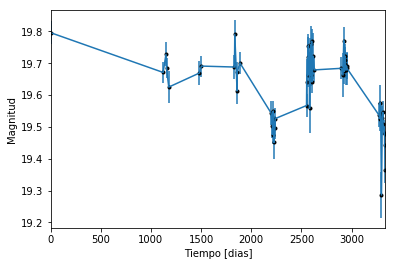

In [2]:
data = np.genfromtxt('LC_U_99669.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

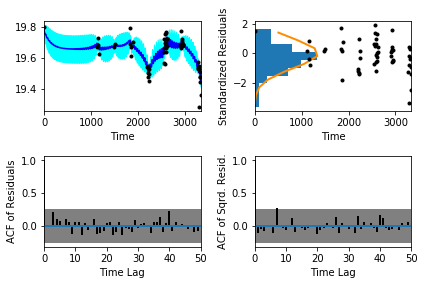

In [5]:
sample.assess_fit()

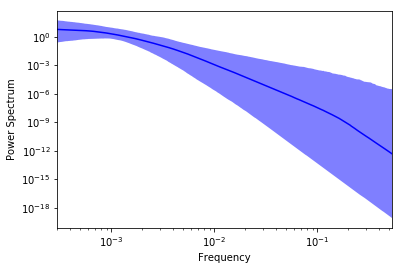

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

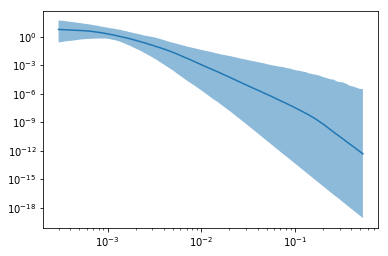

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

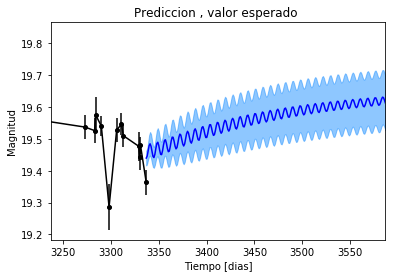

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

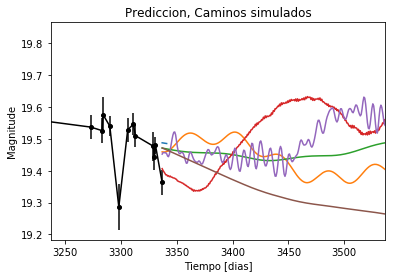

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 6
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


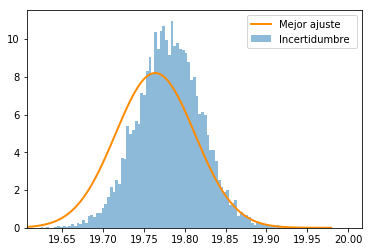

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

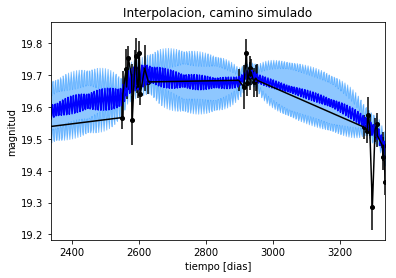

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

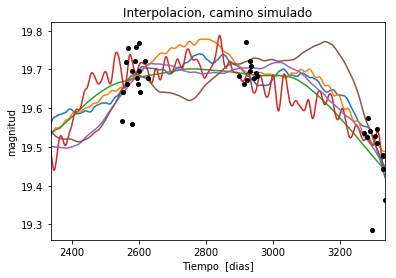

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 334.183353664
Median: 0.00296127381374
Standard deviation: 0.233278344859
68% credibility interval: [ 0.          0.29763153]
95% credibility interval: [ 0.         0.8779291]
99% credibility interval: [ 0.          1.02067648]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 334.183353664
Median: 0.00296127381374
Standard deviation: 0.233278344859
68% credibility interval: [ 0.          0.29763153]
95% credibility interval: [ 0.         0.8779291]
99% credibility interval: [ 0.          1.02067648]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1675.82405027
Median: 0.0
Standard deviation: 0.000536779629379
68% cred

Plotting parameter summary


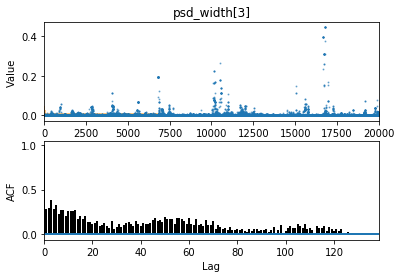

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1380.335673
Median: 100.68677868
Standard deviation: 1.54981626318
68% credibility interval: [  98.94020702  101.76255829]
95% credibility interval: [  96.56958695  102.59495892]
99% credibility interval: [  94.69057525  103.02464781]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 656.496538109
Median: 0.508243401127
Standard deviation: 1.89407951722
68% credibility interval: [ 0.04641226  3.12880237]
95% credibility interval: [ 0.01251838  6.43634794]
99% credibility interval: [  8.77654218e-03   9.10734608e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 504.515894215
Median: 0.214115515991
Standard deviation: 8.48012626304
68% credibility interval: [  5.50855530e-03   5.53827254e+00]
95% credibility interv

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4465.29376016
Median: 7.96698582744e-29
Standard deviation: 1.96513376326e+107
68% credibility interval: [  7.13308099e-100   1.80882746e+000]
95% credibility interval: [  6.32320224e-128   2.37602405e+093]
99% credibility interval: [  2.42577116e-134   1.36536640e+106]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2736.6238009
Median: 19.6434581243
Standard deviation: 0.0683123269167
68% credibility interval: [ 19.59468432  19.69498132]
95% credibility interval: [ 19.50261566  19.77712463]
99% credibility interval: [ 19.37866179  19.86530488]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 334.183353664
Median: 0.00296127381374
Standard deviation: 0.233278344859
68% credibility interval: [ 0.          0.29763153]
95% credibility interval: [ 0.         0.8779291]
99% credibility interval: [ 0.          1.02067648]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 334.183353664
Median: 0.00296127381374
Standard deviation: 0.233278344859
68% credibility interval: [ 0.          0.29763153]
95% credibility interval: [ 0.         0.8779291]
99% credibility interval: [ 0.          1.02067648]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1675.82405027
Median: 0.0
Standard deviation: 0.000536779629379
68% cred

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1380.335673
Median: 100.68677868
Standard deviation: 1.54981626318
68% credibility interval: [  98.94020702  101.76255829]
95% credibility interval: [  96.56958695  102.59495892]
99% credibility interval: [  94.69057525  103.02464781]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2101.46996926
Median: 0.00706106677417
Standard deviation: 0.180513300589
68% credibility interval: [ 0.00061915  0.14843506]
95% credibility interval: [  3.25026052e-04   7.19761598e-01]
99% credibility interval: [  3.04218216e-04   9.64972454e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 611.981198319
Median: 0.00149874403874
Standard deviation: 0.0787196441618
68% credibility interval: [ 0.00044453  0.0286538 ]
95% credibility interval: [ 0.00031366  0.26189142]
99% credibility interval: [  3.02237009e-04   5.19204674e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1516.31147684
Median: 0.0113165765685
Standard

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1161.48373843
Median: 0.0141461139961
Standard deviation: 0.025694253196
68% credibility interval: [ 0.00776634  0.03103012]
95% credibility interval: [ 0.00466475  0.07715485]
99% credibility interval: [ 0.00338144  0.16483523]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2234.22310767
Median: 1.21549313653
Standard deviation: 0.189867186288
68% credibility interval: [ 1.03752669  1.41156537]
95% credibility interval: [ 0.90483464  1.64386644]
99% credibility interval: [ 0.82291692  1.81681649]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 593.375972664
Median: 2.19923537251e-05
Standard deviation: 0.0937073799945
68% credibility interval: [  2.52449386e-08   2.20237008e-03]
95% credibility interval: [  3.66347792e-98   1.19566406e-01]
99% credibility interval: [  6.28930871e-112   5.74514282e-001]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2101.46996926
Median: (-0.0443659910085-0.407740174573j)
Standard deviation: 1.85331428651
68% credibility interval: [-0.93264498-0.71090661j -0.00389024-0.07152459j]
95% credibility interval: [ -4.52239550e+00+0.j          -2.04219892e-03-0.00322175j]
99% credibility interval: [ -6.06310074e+00+0.j          -1.91145942e-03-0.00514045j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 611.981198319
Median: (-0.00941688652346+0.00454828721229j)
Standard deviation: 1.54693462332
68% credibility interval: [-0.18003715+0.73749863j -0.00279308+0.00276376j]
95% credibility interval: [-1.64551232+4.05681324j -0.00197077+0.00712193j]
99% credibility interval: [ -3.26225918e+00+5.853742j    -1.89901113e-03+0.00826767j]
Posterior

Plotting 2d PDF w KDE


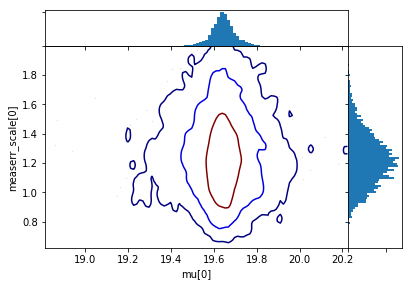

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


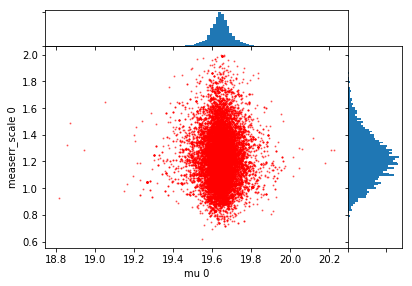

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


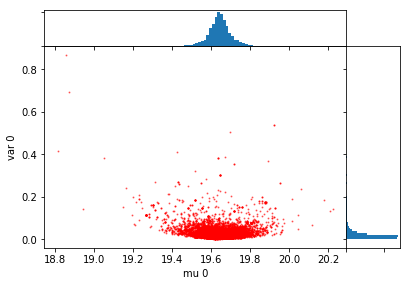

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


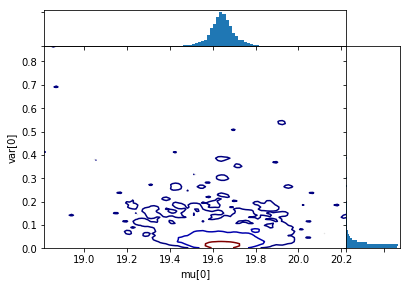

In [42]:
sample.plot_2dkde('mu', 'var', doShow=True)